In [1]:
from natto import MeCab
import CaboCha
from pyknp import Juman, KNP

from crepedb import CrepeDB

from nlplib_mecab import *
from nlplib_cabocha import *
from nlplib_pyknp import *

# natto-py(mecab)
https://pypi.org/project/natto-py/

https://github.com/buruzaemon/natto-py

https://natto-py.readthedocs.io/en/master/

In [2]:
parser = MeCab("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
#parser = MeCab()
nodes = parser.parse("私は人間です。",as_nodes=True)

for node in nodes:
    if not node.is_eos():
        print(node.surface, " : ", node.feature, node.cost, node.posid)

私  :  名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ 2737 59
は  :  助詞,係助詞,*,*,*,*,は,ハ,ワ 3163 16
人間  :  名詞,一般,*,*,*,*,人間,ニンゲン,ニンゲン 6506 38
です  :  助動詞,*,*,*,特殊・デス,基本形,です,デス,デス 7819 25
。  :  記号,句点,*,*,*,*,。,。,。 4429 7


In [3]:
parser = MeCab("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
text = """
私は人間です。
呼吸と食事ができます。
私は望遠鏡で泳ぐ少女を見た。
"""
mecab_parse2df(text, parser)

DEBUG:root:私は人間です
DEBUG:root:呼吸と食事ができます
DEBUG:root:私は望遠鏡で泳ぐ少女を見た


,文番号,表層,品詞1,品詞2,品詞3,品詞4,原型,cost,posID
0,0,私,名詞,代名詞,一般,*,私,2737,59
1,0,は,助詞,係助詞,*,*,は,3163,16
2,0,人間,名詞,一般,*,*,人間,6506,38
3,0,です,助動詞,*,*,*,です,7819,25
4,1,呼吸,名詞,サ変接続,*,*,呼吸,4605,36
5,1,と,助詞,並立助詞,*,*,と,7426,23
6,1,食事,名詞,サ変接続,*,*,食事,10766,36
7,1,が,助詞,格助詞,一般,*,が,9986,13
8,1,でき,動詞,自立,*,*,できる,12695,31
9,1,ます,助動詞,*,*,*,ます,10777,25


# CaboCha
https://qiita.com/ayuchiy/items/c3f314889154c4efa71e

In [4]:
c = CaboCha.Parser()
sentence = """
私は人間です。
呼吸と食事ができます。
私は望遠鏡で泳ぐ少女を見た。
"""
print(c.parseToString(sentence))

tree =  c.parse(sentence)
print(tree.toString(CaboCha.FORMAT_TREE))
print(tree.toString(CaboCha.FORMAT_LATTICE))


chunkId = 0
for i in range(tree.size()):
    token = tree.token(i)
    if token.chunk != None:
        print(chunkId, token.chunk.link, token.chunk.head_pos, token.chunk.func_pos, token.chunk.score)
        chunkId += 1
    print(token.surface, token.feature, token.ne)

      私は-D                
  人間です。-----D          
        呼吸と-D |          
          食事が-D          
        できます。---------D
                私は-------D
              望遠鏡で-D   |
                    泳ぐ-D |
                    少女を-D
                      見た。
EOS

      私は-D                
  人間です。-----D          
        呼吸と-D |          
          食事が-D          
        できます。---------D
                私は-------D
              望遠鏡で-D   |
                    泳ぐ-D |
                    少女を-D
                      見た。
EOS

* 0 1D 0/1 1.330539
私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ,,
は	助詞,係助詞,*,*,*,*,は,ハ,ワ,,
* 1 4D 0/1 1.654762
人間	名詞,一般,*,*,*,*,人間,ニンゲン,ニンゲン,,
です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス,,
。	記号,句点,*,*,*,*,。,。,。,,
* 2 3D 0/1 0.497719
呼吸	名詞,サ変接続,*,*,*,*,呼吸,コキュウ,コキュー,,
と	助詞,並立助詞,*,*,*,*,と,ト,ト,,
* 3 4D 0/1 3.479296
食事	名詞,サ変接続,*,*,*,*,食事,ショクジ,ショクジ,,
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ,,
* 4 9D 0/1 -1.892864
でき	動詞,自立,*,*,一段,連用形,できる,デキ,デキ,でき/出来,
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス,,
。	記号,句点,*,*,*,*,。,。,。,,
* 5 9D 0/1 -1

DEBUG:root:私は人間です
DEBUG:root:呼吸と食事ができます
DEBUG:root:私は望遠鏡で泳ぐ少女を見た


Chunk 0 : 
	morphs : 
		##0 : 私 私 名詞 代名詞 一般 *##
		##1 : は は 助詞 係助詞 * *##
	dst : 1
	srcs : { }
Chunk 1 : 
	morphs : 
		##0 : 人間 人間 名詞 一般 * *##
		##1 : です です 助動詞 * * *##
	dst : -1
	srcs : { }
Chunk 0 : 
	morphs : 
		##0 : 呼吸 呼吸 名詞 サ変接続 * *##
		##1 : と と 助詞 並立助詞 * *##
	dst : 1
	srcs : { }
Chunk 1 : 
	morphs : 
		##0 : 食事 食事 名詞 サ変接続 * *##
		##1 : が が 助詞 格助詞 一般 *##
	dst : 2
	srcs : { }
Chunk 2 : 
	morphs : 
		##0 : でき できる 動詞 自立 * *##
		##1 : ます ます 助動詞 * * *##
	dst : -1
	srcs : { }


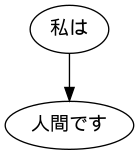

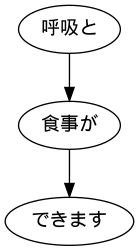

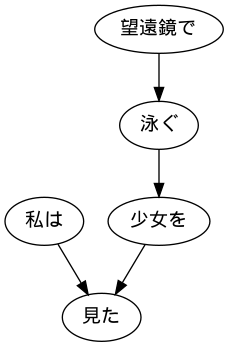

In [5]:
parser = CaboCha.Parser()
text = """
私は人間です。
呼吸と食事ができます。
私は望遠鏡で泳ぐ少女を見た。
"""
novel_list = cabocha_make_novellist(text, parser)

novel_list[0][0].print_chunk()
novel_list[0][1].print_chunk()
novel_list[1][0].print_chunk()
novel_list[1][1].print_chunk()
novel_list[1][2].print_chunk()

cabocha_dependency_visualize(novel_list)

# pyknp(JUMAN)


In [6]:
juman = Juman()
res = juman.analysis("すもももももももものうち")

for m in res.mrph_list():
    print (m.midasi, m.yomi, m.genkei, m.hinsi, m.bunrui, m.katuyou1, m.katuyou2, m.imis, m.repname)

すもも すもも すもも 名詞 普通名詞 * * 自動獲得:テキスト 
も も も 助詞 副助詞 * * NIL 
もも もも もも 名詞 普通名詞 * * 代表表記:股/もも カテゴリ:動物-部位 股/もも
も も も 助詞 副助詞 * * NIL 
もも もも もも 名詞 普通名詞 * * 代表表記:股/もも カテゴリ:動物-部位 股/もも
の の の 助詞 接続助詞 * * NIL 
うち うち うち 名詞 副詞的名詞 * * 代表表記:うち/うち うち/うち


# pyknp(KNP)
https://pyknp.readthedocs.io/en/latest/
https://gist.github.com/pizzacat83/f314d48bfd9c3f69757e40cee4805e9b

In [7]:
#knp = KNP(option = "-tab -anaphora)
knp = KNP(jumanpp=True)
result = knp.parse("すもももももももものうち")

for bnst in result.bnst_list():
    print(bnst.midasi)
    
print("\n文節")
for bnst in result.bnst_list(): # 各文節へのアクセス
    print("\tID:%d, 見出し:%s, 係り受けタイプ:%s, 親文節ID:%d, 素性:%s" \
            % (bnst.bnst_id, "".join(mrph.midasi for mrph in bnst.mrph_list()), bnst.dpndtype, bnst.parent_id, bnst.fstring))

print("\n基本句")
for tag in result.tag_list(): # 各基本句へのアクセス
    print("\tID:%d, 見出し:%s, 係り受けタイプ:%s, 親基本句ID:%d, 素性:%s" \
            % (tag.tag_id, "".join(mrph.midasi for mrph in tag.mrph_list()), tag.dpndtype, tag.parent_id, tag.fstring))

print("\n形態素")
for mrph in result.mrph_list(): # 各形態素へのアクセス
    print("\tID:%d, 見出し:%s, 読み:%s, 原形:%s, 品詞:%s, 品詞細分類:%s, 活用型:%s, 活用形:%s, 意味情報:%s, 代表表記:%s" \
            % (mrph.mrph_id, mrph.midasi, mrph.yomi, mrph.genkei, mrph.hinsi, mrph.bunrui, mrph.katuyou1, mrph.katuyou2, mrph.imis, mrph.repname))

すももも
ももも
ももの
うち

文節
	ID:0, 見出し:すももも, 係り受けタイプ:P, 親文節ID:1, 素性:<文頭><モ><助詞><体言><係:未格><並キ:名:&ST:2.5&&モ><区切:1-4><並列タイプ:AND><格要素><連用要素><正規化代表表記:すもも/すもも><主辞代表表記:すもも/すもも><並列類似度:2.516><並結句数:2><並結文節数:1>
	ID:1, 見出し:ももも, 係り受けタイプ:D, 親文節ID:3, 素性:<モ><モ〜><助詞><体言><係:未格><並キ:名:&ST:2.5&&モ><区切:1-4><並列タイプ:AND><格要素><連用要素><正規化代表表記:股/もも?桃/もも><主辞代表表記:股/もも?桃/もも><並列類似度:-100.000>
	ID:2, 見出し:ももの, 係り受けタイプ:D, 親文節ID:3, 素性:<モ〜><助詞><連体修飾><体言><係:ノ格><区切:0-4><正規化代表表記:股/もも?桃/もも><主辞代表表記:股/もも?桃/もも>
	ID:3, 見出し:うち, 係り受けタイプ:D, 親文節ID:-1, 素性:<文末><形副名詞><時間><外の関係><体言><用言:判><体言止><レベル:C><区切:5-5><ID:（文末）><強数量修飾><副詞><提題受:30><主節><状態述語><正規化代表表記:うち/うち><主辞代表表記:うち/うち>

基本句
	ID:0, 見出し:すももも, 係り受けタイプ:P, 親基本句ID:1, 素性:<文頭><モ><助詞><体言><係:未格><並キ:名:&ST:2.5&&モ><区切:1-4><並列タイプ:AND><格要素><連用要素><名詞項候補><先行詞候補><正規化代表表記:すもも/すもも>
	ID:1, 見出し:ももも, 係り受けタイプ:D, 親基本句ID:3, 素性:<モ><モ〜><助詞><体言><係:未格><並キ:名:&ST:2.5&&モ><区切:1-4><並列タイプ:AND><格要素><連用要素><名詞項候補><先行詞候補><正規化代表表記:股/もも?桃/もも><解析格:ガ>
	ID:2, 見出し:ももの, 係り受けタイプ:D, 親基本句ID:3, 素性:<モ〜><助詞><連体修飾><体言><係:ノ格><区切:0-4><名詞項候補><先行詞候補>

DEBUG:root:私は人間です
DEBUG:root:呼吸と食事ができます
DEBUG:root:私は望遠鏡で泳ぐ少女を見た


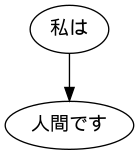

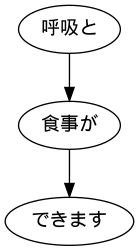

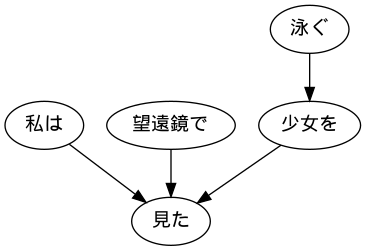

In [8]:
knp = KNP(jumanpp=True)
text = """
私は人間です。
呼吸と食事ができます。
私は望遠鏡で泳ぐ少女を見た。
"""

novel_list = pyknp_make_novellist(text, knp)
pyknp_dependency_visualize(novel_list)